# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

In [2]:
# Загружаем данные

df = pd.read_csv('telecom_users.csv')

df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
# Сводная информация по столбцам

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


Столбец 'Unnamed: 0' судя по всему не несет какой-либо информации, а тип данных в столбце 'TotalCharges' должен быть числовым (float или int).

In [4]:
# Удаляем ненужный 'Unnamed' столбец

df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Пробуем преобразовать данные из столбца 'TotalCharges' в формат float

errors = []


def float_converter(vec, errors=errors):
    
    '''
    Конвертируем данные в столбце 'TotalCharges' в формат float,
    а если не получается, то проблемное значение сохраняем в список,
    а вместо него используем произведение значений из столбцов 'tenure' и 'MonthlyCharges'.
    
    Принимаем на вход вектор из трех столбцов: 'tenure', 'MonthlyCharges', 'TotalCharges'.
    Возвращаем столбец 'TotalCharges'.
    '''
   
    try:
        vec[2] = float(vec[2])
    except ValueError:
        tmp = vec[2]
        vec[2] = vec[0] * vec[1]
        errors.append((tmp, vec[2]))
    return vec[2]

In [6]:
df.TotalCharges = df[['tenure', 'MonthlyCharges', 'TotalCharges']].apply(float_converter, axis=1)

# Смотрим на проблемные значения в 'TotalCharges'

print(*errors, sep='\n')

(' ', 0.0)
(' ', 0.0)
(' ', 0.0)
(' ', 0.0)
(' ', 0.0)
(' ', 0.0)
(' ', 0.0)
(' ', 0.0)
(' ', 0.0)
(' ', 0.0)


Выясним откуда взялись пустые строки в 'TotalCharges'. 

In [7]:
df[df.TotalCharges == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,No
634,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
2771,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
3086,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
3255,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
4326,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
5375,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
5382,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5695,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
5951,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No


Получается, что пустые строки в 'TotalCharges' соответствуют новым пользователям, которые пользуются услугами компании не более месяца и еще не успели совершить первый платеж.

In [8]:
# Сводная статистика по количественным признакам

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5986.0,0.161377,0.367909,0.00,0.0000,0.000,0.0,1.00
tenure,5986.0,32.468760,24.516391,0.00,9.0000,29.000,56.0,72.00
MonthlyCharges,5986.0,64.802213,30.114702,18.25,35.6500,70.400,89.9,118.75
TotalCharges,5986.0,2294.221559,2274.164124,0.00,401.5875,1408.575,3841.5,8684.80


Итак, данные содержат три количественных признака: 'tenure', 'MonthlyCharges' и 'TotalCharges' (считаем, что 'SeniorCitizen' попал сюда по ошибке). 

In [9]:
# Сводная статистика по категориальным признакам

df.describe(include=np.object).transpose()

,count,unique,top,freq
customerID,5986,5986,7729-XBTWX,1
gender,5986,2,Male,3050
Partner,5986,2,No,3082
Dependents,5986,2,No,4195
PhoneService,5986,2,Yes,5396
MultipleLines,5986,3,No,2848
InternetService,5986,3,Fiber optic,2627
OnlineSecurity,5986,3,No,2982
OnlineBackup,5986,3,No,2605
DeviceProtection,5986,3,No,2640


Из статистики по оставшимся признакам видно, что бОльшая часть признаков содержит по три уникальных значения, также есть и бинарные признаки, а признак 'PaymentMethod' принимает 4 значения. Кроме этого получили портрет среднестатистического клиента компании.

# 2. Исследование зависимостей и формулирование гипотез

In [10]:
# Количественные признаки

num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Матрица корреляций

df[num_col].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.256983,0.827756
MonthlyCharges,0.256983,1.000000,0.656762
TotalCharges,0.827756,0.656762,1.000000


Вполне ожидаемо, что признак 'TotalCharges' сильно скоррелирован с признаком 'tenure'. Собственно говоря, общая сумма должна быть равна произведению суммы оплаты за месяц на количество месяцев. Посмотрим на распределения значений количественных признаков.

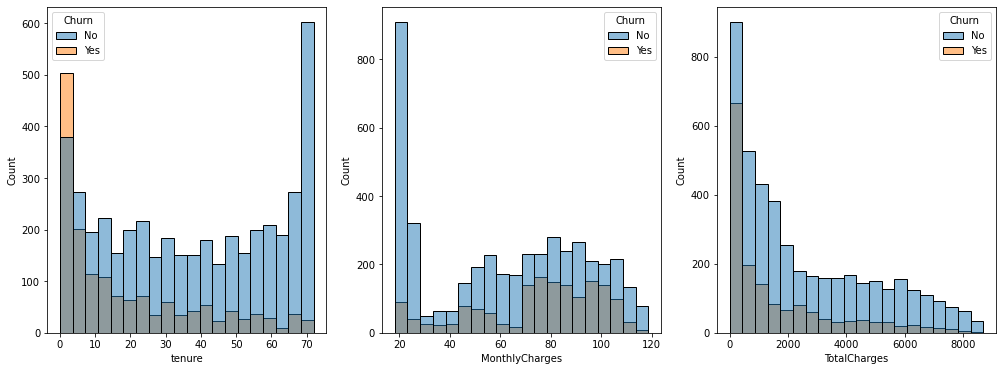

In [11]:
_, axs = plt.subplots(figsize=(17, 6), nrows=1, ncols = len(num_col))

for col, ax in zip(num_col, axs):
    sns.histplot(data=df, hue='Churn', x=col, ax=ax, bins=20)
    
plt.show()

Из гистограмм можно сделать следующие выводы. Большинство клиентов в нашей выборке пользуются услугами компании примерно 2 - 3 месяца. На этот же период приходится и  максимум ушедших клиентов. Второе пиковое значение - в районе 70 месяцев. Здесь уже подавляющее большинство - это лояльные клиенты. Данных за остальные периоды (между пиками) меньше, но в целом доля ушедших клиентов уменьшается с увеличением количества месяцов пользования услугами компании. Примерно до 3-го месяца количество ушедших клиентов превышает количество лояльных, а примерно до 15-го месяца доля оттока составляет более 50%.
В разрезе месячной оплаты можно сказать, что для подавляющего большинства клиентов оплата за месяц составляет около 20, а наибольшая доля ушедших клиентов приходится на значения примерно от 70 до 110.
Последний признак зависит от первых двух, количество лояльных и нелояльных клиентов уменьшается с увеличением общей суммы.

Посмотрим теперь на категориальные признаки.

In [12]:
# Бинарные признаки

bin_col = [col for col in df.columns if df[col].nunique() == 2 and col != 'Churn']

# Остальные категориальные признаки (без 'customerID' и целевого 'Churn')

cat_col = list(set(df.columns) - set(num_col) - set(bin_col) - set(('customerID', 'Churn')))

In [13]:
def cat_plot_helper(columns, data=df):
    
    '''
    Строим барчарты для каждого признака в разрезе влияния на целевой
    и возвращаем информацию о степени этого влияния
    '''
    
    _, axs = plt.subplots(figsize=(10, 5 * len(columns)), nrows=len(columns), ncols = 1)

    importance_level = {}
    for col, ax in zip(columns, axs):
        tmp = data.assign(dummy=1).groupby([col, 'Churn'])['dummy'].count()\
                             .groupby(level=0).apply(lambda x: x * 100 / x.sum()).unstack()

        plot = tmp.plot.barh(fontsize=12, stacked=True,
                    title=col, ax=ax)
        plot.title.set_size(12)
        plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=12)
        plot.set(ylabel=None, xlabel=None)
        
#         Будем считать степень влияния как разницу между максимальным процентным количеством ушедших
#         клиентов и минимальным во всех категориях признака
        
        importance_level.update({col: tmp['Yes'].max() - tmp['Yes'].min()})
 
    plt.show()
    return importance_level

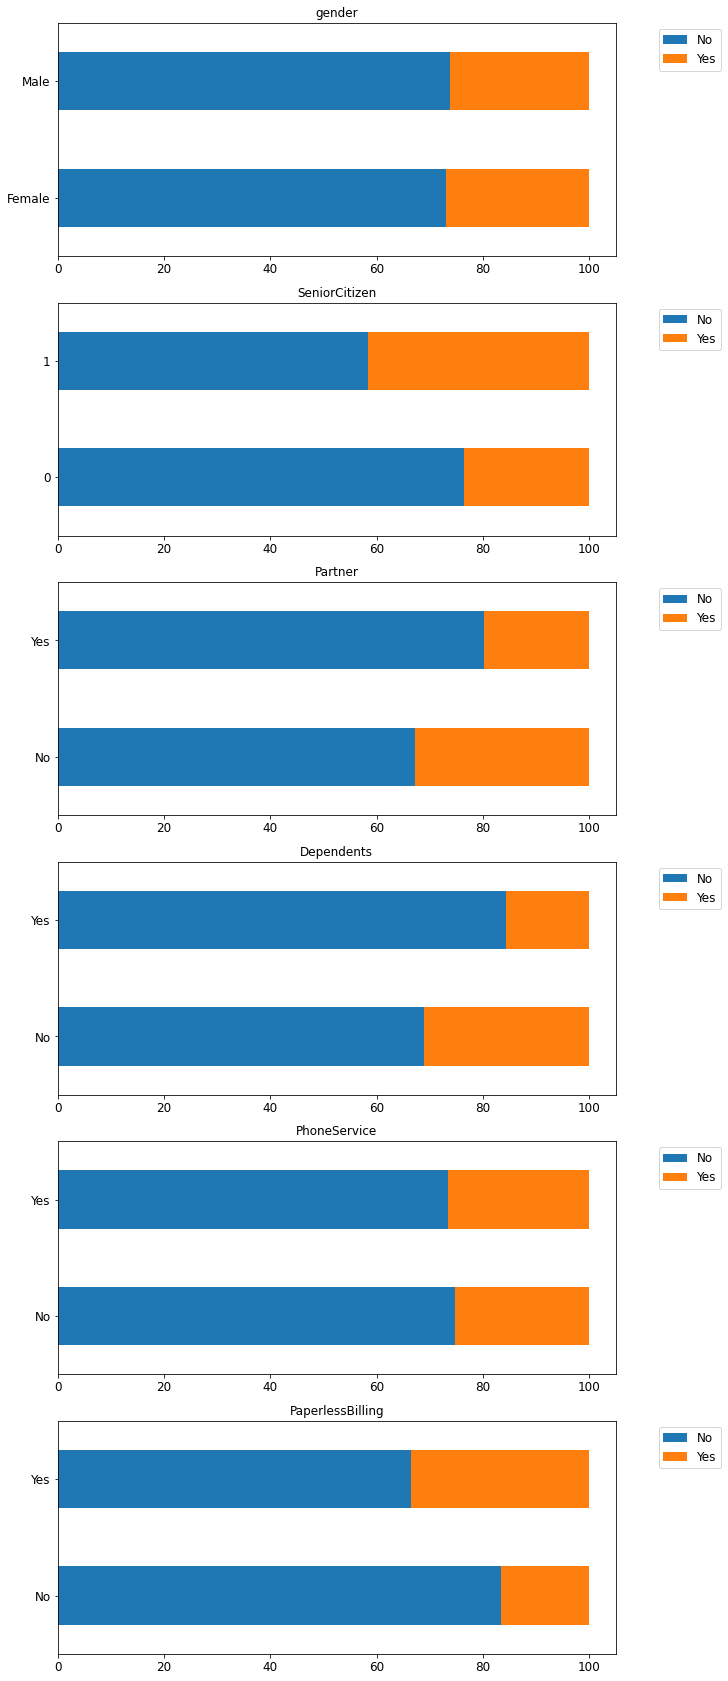

In [14]:
bin_importance = cat_plot_helper(bin_col)

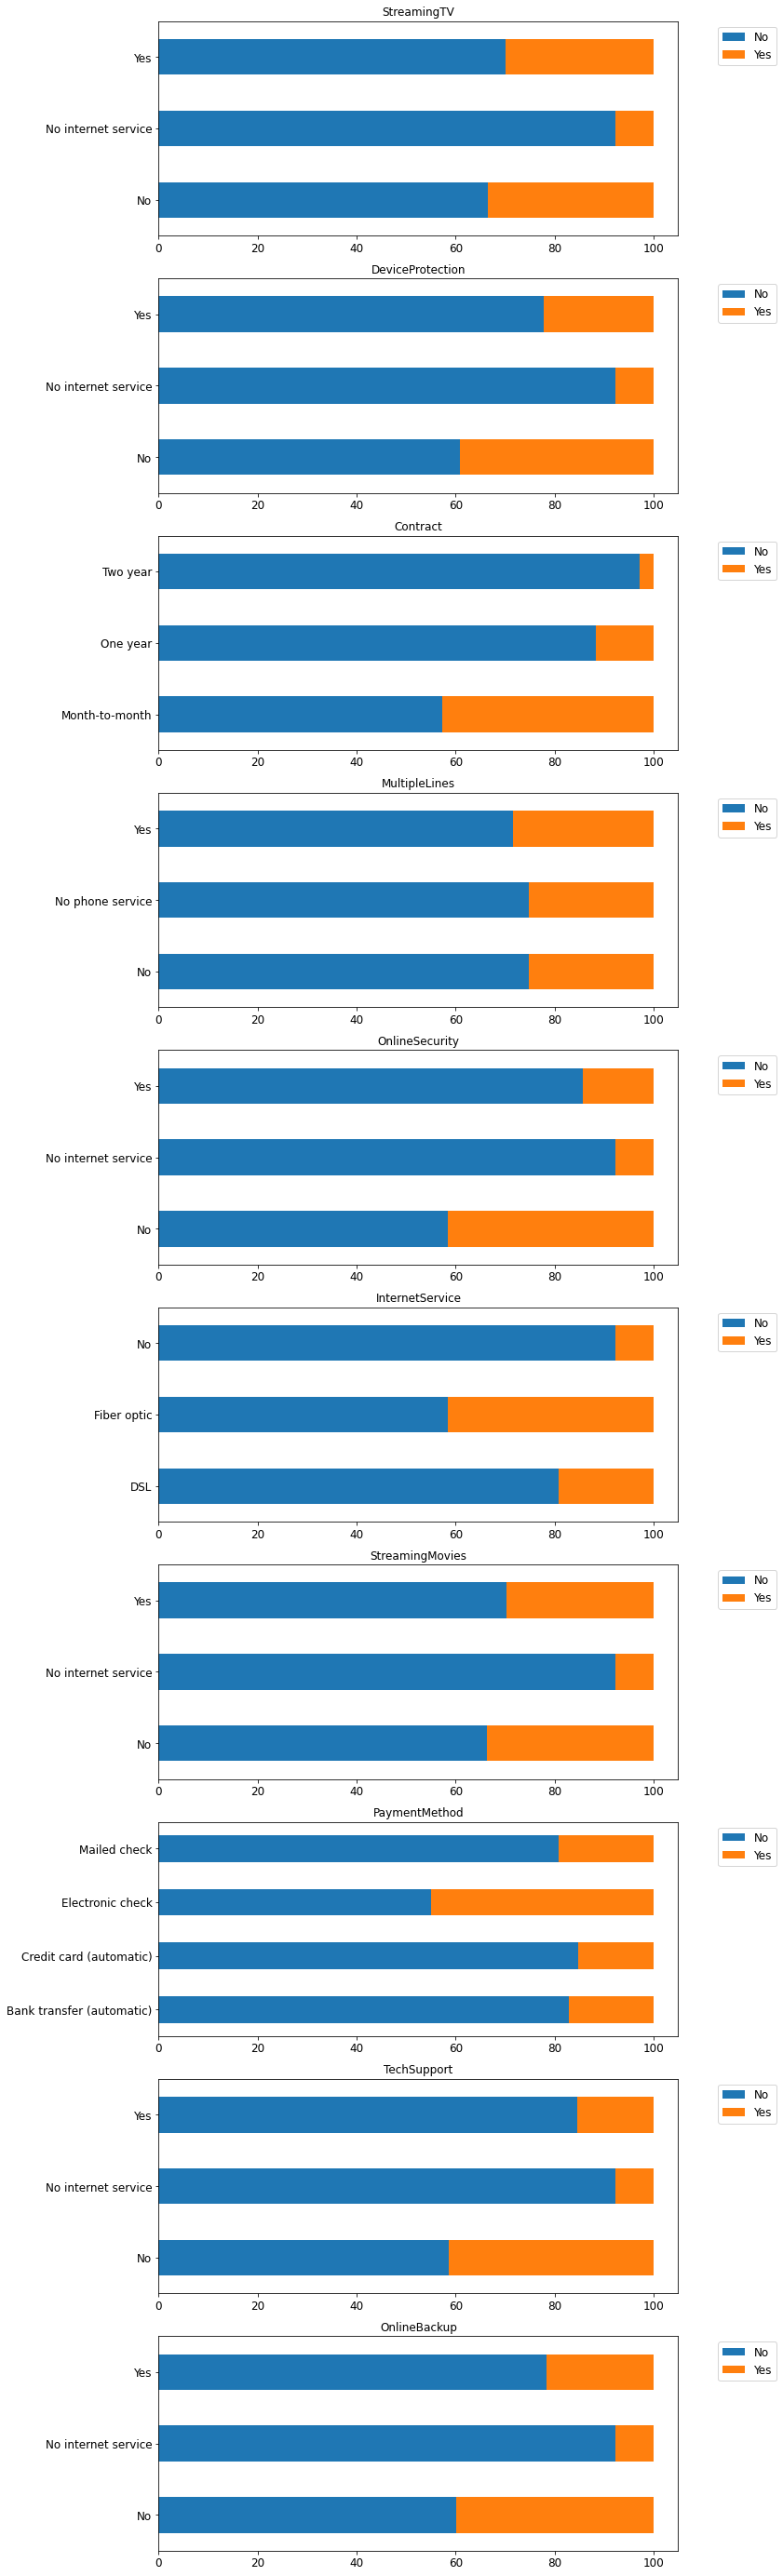

In [15]:
cat_importance = cat_plot_helper(cat_col)

Из графиков видно, что признаки 'gender' и 'PhoneService' почти не оказывают влияние на отток клиентов. Доля ушедшых клиентов в этих признаках почти поровну распределяется по всем категориям. Такая же ситуация и с признаком 'MultipleLines'.

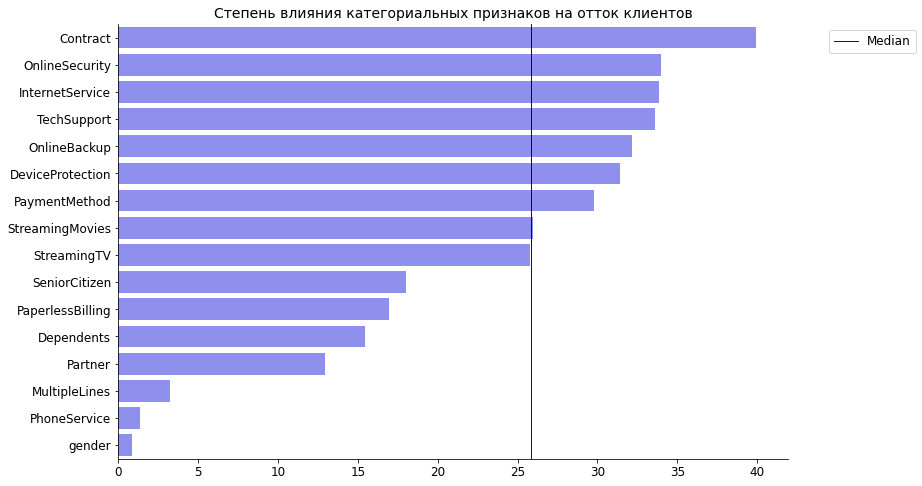

In [16]:
# Обобщаем данные о степени влияния категориальных признаков и визуализируем

cat_importance.update(bin_importance)
importance = pd.Series(cat_importance, index=cat_importance.keys()).sort_values(ascending=False)

_, ax = plt.subplots(figsize=(12, 8))
sns.despine(left=False, bottom=False, right=True)

sns.barplot(
            y=importance.index,
            x=importance.values,
            alpha=0.5,
            dodge=False,
            color='blue',
            ax=ax).set(ylabel=None, xlabel=None)

ax.axvline(x=importance.median(), color='black', label='Median', linewidth=0.9, linestyle='-')

ax.set_title("Степень влияния категориальных признаков на отток клиентов", fontsize=14)
ax.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=12)
ax.tick_params(labelsize=12)

plt.show()

Можно сделать вывод, что признак 'Contract' лучше всего 'разделяет' клиентов на лояльных и нелояльных. Также высокую степень влияния имеют признаки, связанные с интернет-соединением и методом оплаты услуг. Меньше всего на отток влияют пол клиента и наличие информации об услугах телефонной связи.

Очевидно, что признаки не независимы имеют определенную взаимосвязь друг с другом. Посмотрим на явно связанные признаки 'PhoneService' и 'MultipleLines' 

In [17]:
pd.crosstab(df['PhoneService'], df['MultipleLines'])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,590,0
Yes,2848,0,2548


Очевидно, что значения 'No' в 'PhoneService' и 'No phone service' в 'MultipleLines' соответствуют одним и тем же людям. Более того, один признак является следствием другого.

In [18]:
# Проверим это

((df['PhoneService'] == 'No') == (df['MultipleLines'] == 'No phone service')).unique()

array([ True])

In [19]:
df[df['PhoneService'] == 'Yes'].shape[0] == df[df['MultipleLines'] == 'Yes'].shape[0] +\
                                            df[df['MultipleLines'] == 'No'].shape[0]

True

Похожая ситуация с признаками 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' и 'StreamingMovies'.

In [20]:
# Например

((df['InternetService'] == 'No') == (df['StreamingTV'] == 'No internet service')).unique()

array([ True])

# 3. Построение моделей для прогнозирования оттока

Перед построением моделей данные необходимо обработать. Сначала предлагаю оставить данные только по тем клиентам, которые совершили хотя бы один платеж (TotalCharges != 0). Далее из количественных признаков предлагаю оставить наименее скореллированные ('tenure' и 'MontlyCharges'), а бинарные пронумеровать значениями 0 и 1. Что касается остальных категориальных признаков, то существует несколько подходов к их обработке. Предлагаю в данной задаче разбить каждый признак по категориям с помощью pd.get_dummies и получить тем самым несколько бинарных признаков вместо одного категориального.

In [21]:
def data_transformer(data, num_col, bin_col, cat_col, target='Churn'):
    
    '''Преобразуем данные и возвращаем массивы x и y'''
    
#     Удаляем новых клиентов
    
    data_trimmed = data[data.TotalCharges != 0]
    nrows = data_trimmed.shape[0] 

#     Преобразовываем количественные признаки
    
#     scaler.fit(data_trimmed[num_col])
#     num_features = scaler.transform(data_trimmed[num_col])
    num_features = data_trimmed[num_col].values

#     Преобразовываем бинарные признаки 
    
    for col in bin_col:
        data_trimmed[col] = pd.factorize(data_trimmed[col])[0]
    
    bin_features = data_trimmed[bin_col].values
    
#     Преобразуем целевой признак
    
    data_trimmed[target] = data_trimmed[target].map({'Yes': 1, 'No': 0})
    
#     Преобразовываем категориальные признаки и удаляем дублирующие друг друга
 
    cat_features = pd.get_dummies(data_trimmed[cat_col])
    for col in cat_features.columns:
        if col.endswith('No internet service'):
            cat_features.drop(col, axis=1, inplace=True)
    
    cat_features = cat_features.values
    
#     Собираем все вместе

    x = np.hstack([num_features.reshape(nrows, -1), bin_features.reshape(nrows, -1), cat_features.reshape(nrows,-1)])
    y = data_trimmed[target].values
    
    return x, y

In [22]:
num_col.remove('TotalCharges')
bin_col.remove('PhoneService')    # Полностью компенсируется признаком 'MultipleLines'

In [23]:
x, y = data_transformer(df, num_col, bin_col, cat_col)

<ipython-input-21-581dc9315328>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trimmed[col] = pd.factorize(data_trimmed[col])[0]
<ipython-input-21-581dc9315328>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trimmed[target] = data_trimmed[target].map({'Yes': 1, 'No': 0})


In [24]:
x.shape

(5976, 32)

Окончательно имеем 32 признака. Теперь обучим несколько моделей без особой настройки параметров.

In [25]:
# Параметры базовых моделей

# KNeighborsClassifier
knn_params = {
    'n_neighbors': 5,
    'n_jobs': -1
}    

# DecisionTreeClassifier
dtc_params = {
    'max_depth': 10,
    'random_state': 17
}    

# RandomForestClassifier
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_leaf': 1,
    'max_features' : 5,
    'verbose': 0,
    'random_state': 17
}

# SVC
svc_params = {
    'kernel': 'linear',
    'C': 0.025,
    'probability': True,
    'random_state': 17
}

# LogisticRegression
lr_params = {
    'max_iter': 100,
    'n_jobs': -1,
    'C': 1,
    'random_state': 17
}

# XGBClassifier
gb_params = {
    'n_estimators': 100,
    'max_depth': 2,
    'random_state': 17,
    'eval_metric': 'logloss',
    'use_label_encoder': False
}

In [26]:
# Создаем модели

knn = KNeighborsClassifier(**knn_params)
dtc = DecisionTreeClassifier(**dtc_params)
rf = RandomForestClassifier(**rf_params)
svc = SVC(**svc_params)
lr = LogisticRegression(**lr_params)
gb = XGBClassifier(**gb_params)

names = [
    'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier',
    'SVC', 'LogisticRegression', 'XGBClassifier'
]

models = [knn, dtc, rf, svc, lr, gb]


params = {name: dct for name, dct in zip(names, [knn_params, dtc_params, rf_params, svc_params, lr_params, gb_params])}

In [28]:
# Обучаем модели, разбив предварительно данные на тренировочную и тестовую выборки

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, stratify=y, random_state=17)

basic_models = {name: model.fit(x_train, y_train) for name, model in zip(names, models)}

Вывыдем теперь информацию по метрикам. Для начала следует оценить в целом долю правильных ответов (accuracy). Также, согласно условию задачи, модели должны достаточно точно выявлять ушедших клиентов, но при этом не записывая лояльных клиентов в ушедшие. Поэтому посмотрим еще на метрики recall и precision.

In [29]:
def print_metrics(model, data=x_test, true_values=y_test):
    
    """Сводная информация по метрикам"""
    
    print(f'Доля правильных ответов: {accuracy_score(true_values, model.predict(data)):.3f}')
    print(f'Точность: {precision_score(true_values, model.predict(data)):.3f}')
    print(f'Полнота: {recall_score(true_values, model.predict(data)):.3f}')
       

In [30]:
for name, model in basic_models.items():
    print(name)
    print_metrics(model)
    print()

KNeighborsClassifier
Доля правильных ответов: 0.775
Точность: 0.584
Полнота: 0.525

DecisionTreeClassifier
Доля правильных ответов: 0.762
Точность: 0.553
Полнота: 0.538

RandomForestClassifier
Доля правильных ответов: 0.799
Точность: 0.655
Полнота: 0.511

SVC
Доля правильных ответов: 0.806
Точность: 0.671
Полнота: 0.527

LogisticRegression
Доля правильных ответов: 0.799
Точность: 0.650
Полнота: 0.527

XGBClassifier
Доля правильных ответов: 0.790
Точность: 0.626
Полнота: 0.517



# 4. Сравнение качества моделей 

Результаты отличаются не очень сильно. Лучшие значения accuracy соответствуют моделям RandomForest, LogisticRegression и SVC. Самые низкие показатели accuracy у моделей KNeighbors и DecisionTree. Посмотрим теперь как распределены предсказания наших моделей.

In [31]:
def pred_distribution(models, data, true_values, cls=1):
    
    '''Cтроит гистограммы распределения признака "tenure" в соответствии с указанным классом'''
    
#     Получаем значения признака 'tenure'

    feature = data[:, 0]
    
#     Получаем предсказания и истинные значения указанного класса

    pred = {name: feature[model.predict(data) == cls] for name, model in models.items()} 
    true = {'true': feature[true_values == cls]}
    pred.update(true)
    results = pd.Series(pred, index=pred.keys()).reset_index().explode(0)
    
#     Строим графики
    
    _, ax = plt.subplots(figsize=(15, 12))
    sns.histplot(data=results, hue='index', x=results[0], ax=ax,
                 bins=20, multiple='dodge', edgecolor='black', linewidth=.8)
    
    ax.set_xticks([results[0].min() + i * results[0].max() / 20 for i in range(21)])
    ax.set_xlabel('feature')
    plt.show() 

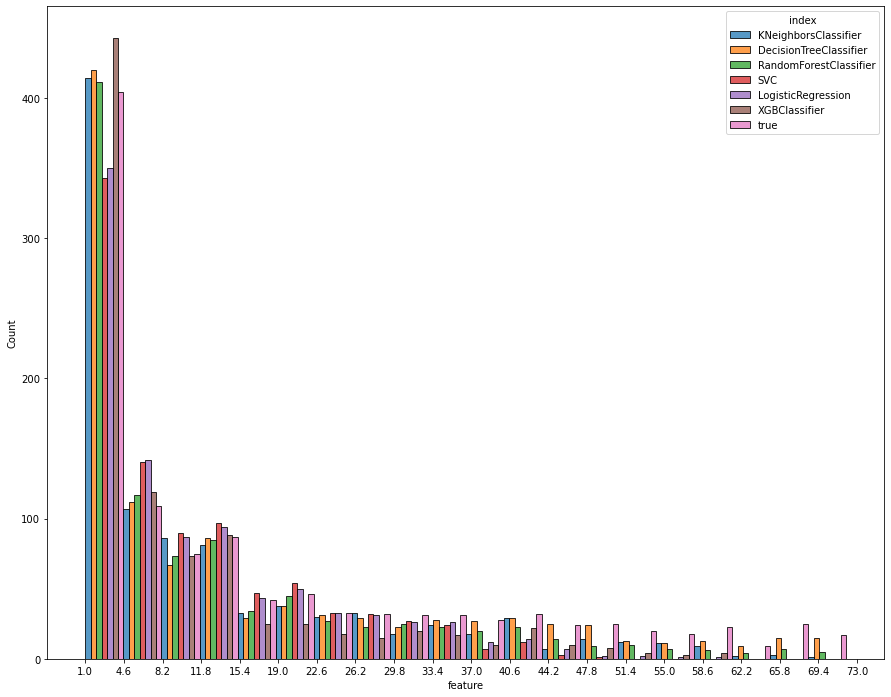

In [32]:
# Тренировочная выборка (класс 1)

pred_distribution(basic_models, x_train, y_train)

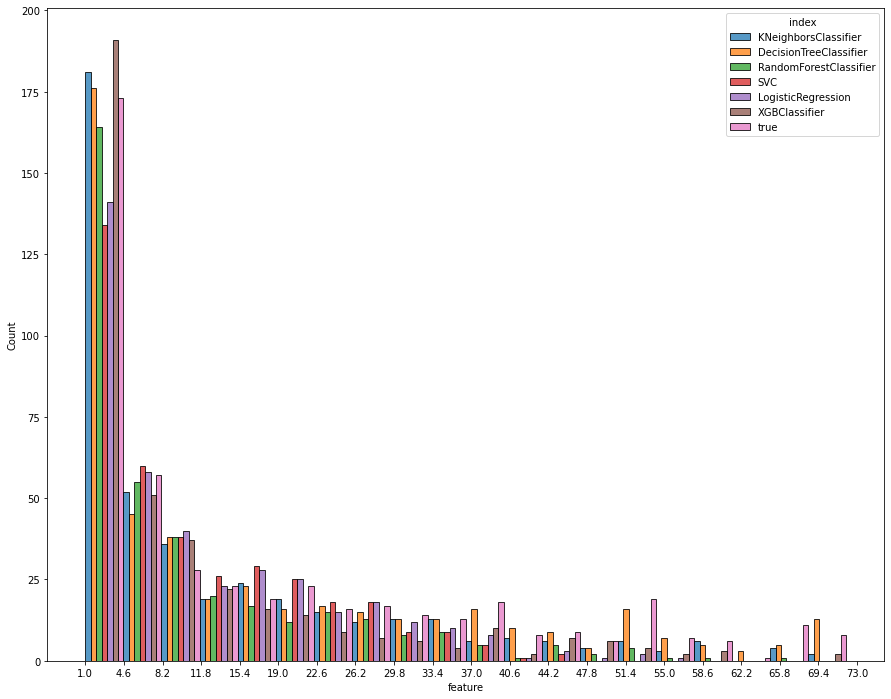

In [33]:
# Тестовая выборка (класс 1)

pred_distribution(basic_models, x_test, y_test)

Из этих графиков можно сделать следующие выводы. Во-первых распределения ответов на тренировочной и тестовой выборках похожи друг на друга, что является хорошим знаком. Также, в отличие от числовых метрик, мы можем наблюдать, как модели работают во всем диапазоне 'feature'. С увеличением значений 'feature' доля правильно предсказанных объектов класса 1 снижается для всех моделей. Некоторые модели ('SVC', 'RandomForest') оказались 'нечувствительными' к большим значениям 'tenure'.

Попробуем теперь настроить гиперпараметры моделей. Для логистической регрессии создадим спецальный  класс.

In [34]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

# LogisticRegression

Cs = np.logspace(-3, 1, num=500)
lr_params.pop('C')

lrCV = LogisticRegressionCV(**lr_params, Cs=Cs, cv=skf, scoring='roc_auc').fit(x_train, y_train)

lr_params['C'] = lrCV.C_

In [35]:
# KNeighborsClassifier
knn_grid_params = {'n_neighbors': range(1, 35)}

# DecisionTreeClassifier
dtc_grid_params = {'max_depth': range(1, 20), 'max_features': range(1, 25)}

# RandomForestClassifier
rf_grid_params = {'n_estimators': range(10, 150, 10), 'min_samples_leaf': range(1, 10), 'max_features': range(1, 25)}

# SVC
svc_grid_params = {'C': np.arange(0.01, 0.07, 0.01)}

# XGBClassifier
gb_grid_params = {
    'n_estimators': range(10, 100, 10),
    'min_child_weight': range(1, 10, 1),
    'subsample': np.arange(0.1, 1., 0.2)
}

grid_params = [knn_grid_params, dtc_grid_params, rf_grid_params, svc_grid_params, gb_grid_params]

In [36]:
names.remove('LogisticRegression')
models.remove(lr)

grid_models = {
    name: GridSearchCV(model, params, cv=skf).fit(x_train, y_train)
    for name, model, params in zip(names, models, grid_params)
}

In [37]:
grid_models.update({'LogisticRegression': lrCV})

In [38]:
# Метрики моделей

for name, model in grid_models.items():
    print(name)
    print_metrics(model)
    print()

KNeighborsClassifier
Доля правильных ответов: 0.788
Точность: 0.652
Полнота: 0.433

DecisionTreeClassifier
Доля правильных ответов: 0.790
Точность: 0.696
Полнота: 0.370

RandomForestClassifier
Доля правильных ответов: 0.810
Точность: 0.687
Полнота: 0.521

SVC
Доля правильных ответов: 0.808
Точность: 0.677
Полнота: 0.527

XGBClassifier
Доля правильных ответов: 0.803
Точность: 0.660
Полнота: 0.534

LogisticRegression
Доля правильных ответов: 0.799
Точность: 0.650
Полнота: 0.523



Метрики немного улучшились. Лучшее значение accuracy у моделей RandomForestClassifier и SVC. Лучшее значение recall у моделей XGBClassifier и SVC.

In [39]:
# Посмотрим на лучшие параметры

for name, model in grid_models.items():
    if name != 'LogisticRegression':
        print(name)
        print(model.best_params_)
        print()
    else:
        print(name)
        print('C =', model.C_)
        print()


KNeighborsClassifier
{'n_neighbors': 12}

DecisionTreeClassifier
{'max_depth': 3, 'max_features': 20}

RandomForestClassifier
{'max_features': 13, 'min_samples_leaf': 9, 'n_estimators': 40}

SVC
{'C': 0.03}

XGBClassifier
{'min_child_weight': 5, 'n_estimators': 30, 'subsample': 0.7000000000000001}

LogisticRegression
C = [0.12595065]



Посмотрим на распределения ответов (класс 1).

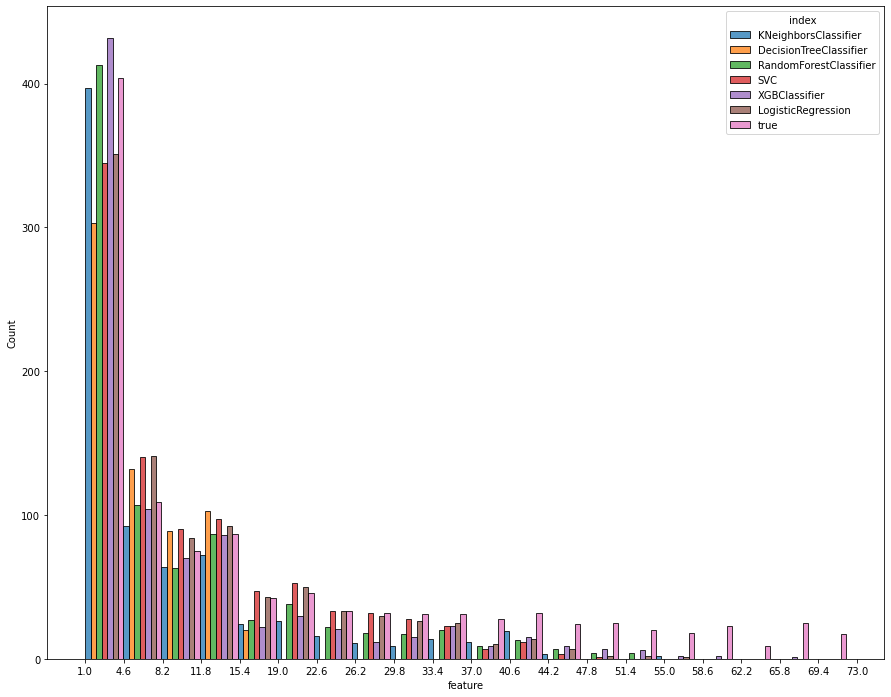

In [40]:
# Тренировочная выборка

pred_distribution(grid_models, x_train, y_train)

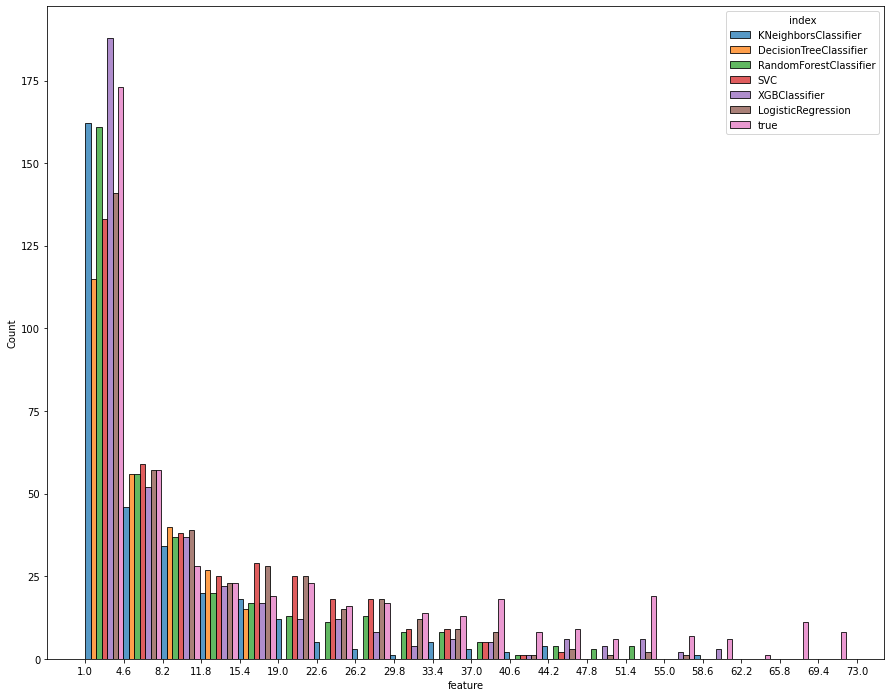

In [41]:
# Тестовая выборка

pred_distribution(grid_models, x_test, y_test)

Несмотря на улучшение метрик, для значений 'feature' превышающих 35 предсказания моделей немного ухудшились.

Теперь для всех моделей выведем значение метрики ROC AUC. Эту метрику можно интерпретировать как 'степень уверенности' модели в своих предсказаниях, то есть случайный объект класса 1 имеет вероятность отнесения к классу 1 выше, чем случайный объект класса 0.

In [42]:
roc_auc_metrics = {name: roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]) for name, model in grid_models.items()}

for name, score in roc_auc_metrics.items():
    print(name)
    print(f'ROC AUC = {score:.3f}')
    print()

KNeighborsClassifier
ROC AUC = 0.809

DecisionTreeClassifier
ROC AUC = 0.817

RandomForestClassifier
ROC AUC = 0.844

SVC
ROC AUC = 0.839

XGBClassifier
ROC AUC = 0.853

LogisticRegression
ROC AUC = 0.842



Получили, что 'XGBClassifier' имеет самое высокое значение ROC AUC. Также у этой модели высокое значение метрики recall при высокой общей доле правильных ответов.